# 筛选没有问题的家庭

In [1]:
# 数据读取
import pandas as pd

pd.set_option('display.max_columns', None)
family2014 = pd.read_csv('数据/居民出行数据/2014/family_2014.csv',dtype=str)
travel2014 = pd.read_csv('数据/居民出行数据/2014/midtable_2014.csv',dtype=str)
familymember_2014 = pd.read_csv('数据/居民出行数据/2014/family_member_2014.csv',dtype=str)
family2023 = pd.read_csv('数据/居民出行数据/2023/family_total_33169.csv',dtype=str)
travel2023 = pd.read_csv('数据/居民出行数据/2023/midtable_total_33169.csv',dtype=str)
familymember_2023 = pd.read_csv('数据/居民出行数据/2023/familymember_total_33169.csv',dtype=str)
family_cluster = pd.read_csv('数据/family_cluster_improved.csv',dtype=str)
cluster_profile = pd.read_csv('数据/cluster_profile_improved.csv',dtype=str)
cluster_profile.columns
cluster_profile.iloc[:,1:] = cluster_profile.iloc[:,1:].astype(float)
## 家庭变量筛选
valid_member_number = familymember_2023.groupby('家庭编号').size().rename('家庭成员数量_real').reset_index()
family2023 = pd.merge(family2023, valid_member_number, on='家庭编号', how='left')
family2023 = family2023[family2023['家庭成员数量'].astype(int) == family2023['家庭成员数量_real']]
valid_family = family2023[['家庭编号']]
familymember_2023 = pd.merge(familymember_2023, valid_family, on='家庭编号', how='inner')
family2023[['家庭成员数量']].value_counts()
## 家庭连续型变量
family2023[['家庭成员数量','家庭工作人口数','机动车数量','脚踏自行车数量','电动自行车数量','摩托车数量','老年代步车数量']]
have_student_family = familymember_2023[familymember_2023['职业'] == '14'].drop_duplicates(['家庭编号'])[['家庭编号']]
have_student_family['have_student'] = 1
family2023 = pd.merge(family2023, have_student_family, on='家庭编号', how='left').fillna({'have_student':0})
## 家庭离散型变量
family2023[['have_student','家庭年收入']]
family2023['家庭年收入'].isna().sum()
## 个人变量筛选
familymember_2023['age'] = 2023 - familymember_2023['出生年份'].astype(int)
familymember_2023['age_group'] = pd.cut(familymember_2023['age'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], right=False, labels=['0-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71-75','76-80','81-85','86-90','91-95','96-100'])
familymember_2023['age'].max() , familymember_2023['age'].min()
# familymember_2023['age'] = (familymember_2023['age'] - familymember_2023['age'].min()) / (familymember_2023['age'].max() - familymember_2023['age'].min())
## 连续型变量
familymember_2023[['age']]
(familymember_2023[familymember_2023['关系']=='0']['age']).describe()
familymember_2023.loc[familymember_2023['最高学历'].isna(),'最高学历'] = familymember_2023.loc[familymember_2023['最高学历'].isna(),'教育阶段']
## 离散型变量,这里的关系有点不太对，有的户主很小
familymember_2023[['性别','是否有驾照','关系','最高学历','职业']]
familymember_2023['是否有驾照'] = familymember_2023['是否有驾照'].fillna('0')

In [2]:
import numpy as np
## 变量编码
income_map = {'A':1, 'B':1, 'C':2, 'D':2, 'E':3, 'F':3, 'G':4, 'I':5, 'J':5, 'K':5}
family2023['家庭年收入'] = family2023['家庭年收入'].map(income_map)
familymember_2023['age_group'] = pd.cut(
    familymember_2023['age'], 
    bins=range(0, familymember_2023['age'].max() + 6, 5),
    labels=False 
)


familymember_2023['age_group'] = familymember_2023['age_group'].fillna(0)
familymember_2023['age'] = familymember_2023['age_group']
# relation_map = {'0':0, '17':1, '1':2, '2':2, '5':2, '6':2, '13':3, '14':3, '15':3, '16':3, '9':3, '10':3, '7':4, '8':4, '11':5, '12':5}
# education_map = {'1':1, '2':1, '3':2, '4':2, '5':3, '6':4, '7':5, '8':6, '9':7}
# occupation_map = {'1':1, '2':1, '3':1, '4':2, '5':2, '6':3, '7':2, '8':3, '9':1, '10':4, '11':4, '12':4, '13':5, '14':6, '15':7, '16':8, '17':8, '18':1, '19':1, '20':8}

# familymember_2023['关系'] = familymember_2023['关系'].map(relation_map)
# familymember_2023['最高学历'] = familymember_2023['最高学历'].map(education_map)
# familymember_2023['职业'] = familymember_2023['职业'].map(occupation_map)
familymember_2023['关系'].value_counts().shape, familymember_2023['最高学历'].value_counts().shape, familymember_2023['职业'].value_counts().shape



((16,), (9,), (20,))

In [3]:
family2023

,编号,家庭编号,所属城区,所属街道,所属社区,添加地址,家庭具体地址,小区编号,小区编号的环路代码,家庭流动人口数,家庭工作人口数,家庭学生人口数,家庭无业人口数,地址经度,地址纬度,调查员编号,调查员姓名,第1次入户时间,第1次敲门状态,第2次入户时间,第2次敲门状态,出行日期,家庭成员数量,住房类型,住房类型其他,住房类型_final,建筑面积,在北京是否更换过居住地址,本户居住起始年份,上一居住地址,上一居住地址经度,上一居住地址纬度,上一居住小区编码,家庭年收入,取快递次数,取外卖次数,脚踏自行车数量,电动自行车数量,摩托车数量,老年代步车数量,机动车数量,状态,成员信息登记状态,成员信息创建时间,成员信息更新时间,车辆信息登记状态,车辆信息创建时间,车辆信息更新时间,住房信息登记状态,住房信息创建时间,住房信息更新时间,出行信息登记状态,行程信息创建时间,出行信息更新时间,调查时的所在位置经度,调查时的所在位置纬度,调查时的所在位置定位时间,创建时间,修改时间,年度,项目名称,type,no.na,家庭成员数量_real,have_student
0,000b2a2b-1333-4d28-8056-8ab1a30870ad,010703000170,2,月坛街道,月坛社区,月坛西街东里21号院16,月坛西街东里21号院1号楼905,010703,3,0,2,0,0,116.349759,39.916528,e4decdee-2b98-4231-b1be-80537da8f151,郭建立,2023/5/15 0:00:00,success,2023/5/18 0:00:00,success,2023/5/16 0:00:00,3,1,-1,1,43.5,0,-1,-1,0,0,-1,3,0,0,3,0,0,0,1,success,saved,2023/5/27 13:25:45,2023/5/27 13:25:44,saved,2023/5/10 10:30:07,2023/6/5 8:49:48,saved,-1,2023/5/27 13:28:51,saved,-1,2023/6/5 8:50:03,NaN,NaN,NaN,2023/5/10 10:30:07,2023/6/8 10:48:55,2023,第六次北京城市交通综合调查（交研都市）,jy,3,3,0.0
1,003d14b7-e5fb-4b53-b10d-ebb4342af81b,040603000173,2,广安门外街道,鸭子桥社区,运达小区004,运达小区18-6-201,040501,3,0,2,0,0,116.345741,39.877241,2b4ad7c1-b331-484b-b6f3-3ba60e5c012e,孙丽群,2023/5/20 0:00:00,success,2023/5/22 0:00:00,success,2023/5/21 0:00:00,2,1,-1,1,70,0,-1,-1,0,0,-1,2,2,0,1,0,0,0,1,success,saved,2023/5/22 12:35:02,2023/5/22 12:36:29,saved,2023/5/20 8:56:11,2023/5/22 12:37:32,saved,-1,2023/5/22 12:37:51,saved,-1,2023/5/22 12:42:31,116.345699,39.877231,2023/5/22 15:12:50,2023/5/20 8:56:11,2023/6/4 22:13:44,2023,第六次北京城市交通综合调查（交研都市）,jy,0,2,0.0
2,00469d0e-2b5f-476f-bf86-ee554e9e3752,010305000086,2,展览路街道,新华里社区,新华里16号院10号楼020,新华里16号院10-2-702,010512,3,0,2,0,0,116.352423,39.935196,0d9d0be5-91d5-42b4-97ed-696f02298e48,王莹,2023/5/23 0:00:00,success,2023/5/25 0:00:00,success,2023/5/24 0:00:00,2,1,-1,1,127,0,-1,-1,0,0,-1,2,2,0,0,1,0,0,1,passed,saved,2023/5/25 9:53:24,2023/5/25 9:53:23,saved,2023/5/22 15:25:46,2023/5/25 9:55:30,saved,-1,2023/5/25 9:55:49,saved,-1,2023/5/25 10:02:23,116.352662,39.935372,2023/5/25 9:18:36,2023/5/22 15:25:46,2023/6/13 11:27:27,2023,第六次北京城市交通综合调查（交研都市）,jy,0,2,0.0
3,004aadb2-8693-438e-b358-56e75ade505e,040505000015,2,广安门外街道,红莲南里社区居委会,常青藤嘉园15,西城区常青藤嘉园2号院3-1106,040506,3,0,2,1,0,116.333144,39.880115,851e42f9-61cd-4ca8-9f28-5ae0544d4b97,李满慧,2023/4/19 0:00:00,success,2023/4/21 0:00:00,success,2023/4/20 0:00:00,3,1,-1,1,70,0,-1,-1,0,0,-1,4,1,0,1,1,0,0,1,success,saved,2023/4/23 18:23:57,2023/4/23 18:23:57,saved,2023/4/17 15:15:24,2023/4/24 22:30:47,saved,-1,2023/4/23 18:24:57,saved,-1,2023/4/25 15:50:29,NaN,NaN,NaN,2023/4/17 15:15:24,2023/5/9 10:37:51,2023,第六次北京城市交通综合调查（交研都市）,jy,3,3,1.0
4,004c99c2-2690-461d-8463-d1850d911656,120201000011,11,庞各庄镇,东中堡村村委会,东中堡村19,东中堡村东街北三条4号,120203,7,0,2,0,0,116.324315,39.644375,d9554d3c-a98a-4f36-afa7-f9565c2d1d76,崔玉晶,2023/6/6 0:00:00,success,2023/6/8 0:00:00,success,2023/6/7 0:00:00,2,6,-1,6,200,0,-1,-1,0,0,-1,1,0,0,1,2,0,0,1,success,saved,2023/6/6 11:30:46,2023/6/6 11:30:46,saved,2023/6/4 23:14:28,2023/6/6 11:32:13,saved,-1,2023/6/6 11:32:35,saved,-1,2023/6/29 11:25:59,116.324315,39.644375,2023/6/6 11:28:16,2023/6/4 23:14:28,2023/6/29 11:26:10,2023,第六次北京城市交通综合调查（交研都市）,jy,0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33161,fff6ec7b-8fa8-453c-b557-2f4c3f6eb05b,132021000002,7,长阳镇,加州水郡东区社区,01,64号楼1单元802,132021,6,0,0,0,0,116.167937,39.767044,6464bd57-78b5-c674-0013-007c01cd8e3e,左金风,2023/5/19 0:00:00,success,2023/5/23 0:00:00,success,2023/5/22 0:00:00,1,1,-1,1,110,0,-1,-1,0,0,-1,1,0,0,1,0,0,0,0,success,saved,2023/5/20 20:13:46,2023/5/23 15:18:21,saved,2023/5/19 10:21:45,2023/5/23 15:18:34,saved,-1,2023/5/23 15:18:50,saved,-1,2023/5/23 20:11:10,116.168532,39.767891,2023/5/19 11:30:13,2023/5/19 10:21:45,2023/5/23 20:11:17,2023,第六次北京城市交通综合调查（民生智库）,ms,0,1,0.0
33162,fffa6aad-791f-420d-b0dc-

# 活动链提取

In [4]:
travelinfo = pd.read_csv('数据/居民出行数据/2023/midtable_total_33169.csv',dtype=str)

In [5]:
travelinfo = pd.merge(travelinfo, family2023[['家庭编号']])

In [6]:
## 活动链太大的去除掉
travel_num_the = travelinfo.groupby(['家庭编号','家庭成员编号']).size().rename('出行次数').reset_index()
more_travel = travel_num_the[travel_num_the['出行次数']>6][['家庭编号']].drop_duplicates()

In [7]:
family2023 = family2023[-family2023['家庭编号'].isin(more_travel['家庭编号'])]

In [8]:
travelinfo = pd.merge(travelinfo, family2023[['家庭编号']])
familymember_2023 = pd.merge(familymember_2023, family2023[['家庭编号']])

In [9]:
## 没有出行的家庭

In [10]:
have_travel_family = travelinfo[['家庭编号']].value_counts().reset_index()[['家庭编号']]

In [11]:
family2023 = family2023[family2023['家庭编号'].isin(have_travel_family['家庭编号'])]
travelinfo = pd.merge(travelinfo, family2023[['家庭编号']])
familymember_2023 = pd.merge(familymember_2023, family2023[['家庭编号']])

## 目的、方式、时间、车辆、陪同

In [12]:
activityinfo = travelinfo[['家庭编号','家庭成员编号','出行序号','出行目的','交通方式的编号','ModelMode','出发时间1小时时间段','到达时间1小时时间段','是驾驶员还是乘客','是否和家庭成员的联合出行']]

In [13]:
## 1:步行;2:自行车、电动自行车；3:公交、地铁；4:小汽车、出租车；5:其他
## 1:步行、自行车、电动自行车；2:公交、地铁；3:小汽车、出租车；4:其他
## 1:步行；2:公交；3:地铁；4:自行车；5:电动自行车；6:小汽车；7:其他机动车；8:班车类； 9:出租 ;10:摩托车; 11:其他

class_map2023 = {
    "1": "1",
    "2.1": "6",
    "2.2": "7",
    "2.3": "7",
    "3": "7",
    "4": "7",
    "5": "10",
    "6": "3",
    "7": "2",
    "8": "9",
    "9": "9",
    "10": "8",
    "11": "8",
    "12": "8",
    "13": "4",
    "14": "4",
    "15": "4",
    "16": "5",
    "17": "11",
    "18": "11",
    "19": "11"
}


In [14]:
activityinfo['是驾驶员还是乘客'] = activityinfo['是驾驶员还是乘客'].fillna('0')

/tmp/ipykernel_2467597/200093675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activityinfo['是驾驶员还是乘客'] = activityinfo['是驾驶员还是乘客'].fillna('0')


In [15]:
activityinfo['ModelMode'] = activityinfo['交通方式的编号'].map(class_map2023)

/tmp/ipykernel_2467597/1644536957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activityinfo['ModelMode'] = activityinfo['交通方式的编号'].map(class_map2023)


In [16]:
#2023数据
# 1：工作
# 2：外出就餐
# 3：公务外出
# 4：上学/校外托管
# 5：探亲访友
# 7：休闲娱乐健身
# 8：个人事务
# 10：接送人
# 13：购物
# 14：其他
# 15：回另一居住地
# 21：下班回家
# 22：放学回家
# 23：个人事务回家
# 24：其他回家

# 1：在家（15,21,22,23,24）
# 2: 工作（1）
# 3：上学（4）
# 4：公务外出类（3）
# 5：外出吃饭
# 6：探亲访友
# 7：休闲娱乐
# 8：购物
# 9：接送人
# 10：其他（8，14）
def get_activity_type2023(r):
    if r in ['15','21','22','23','24']:
        return '1'
    elif r == '1':
        return '2'
    elif r == '4':
        return '3'
    elif r == '3':
        return '4'
    elif r == '2':
        return '5'
    elif r == '5':
        return '6'
    elif r == '7':
        return '7'
    elif r == '13':
        return '8'
    elif r in ['10']:
        return '9'
    elif r in ['8', '14']:
        return '10'

In [17]:
activityinfo['ActivityType'] = activityinfo['出行目的'].apply(get_activity_type2023)

/tmp/ipykernel_2467597/974261224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activityinfo['ActivityType'] = activityinfo['出行目的'].apply(get_activity_type2023)


# 训练集和测试集保存

In [18]:
## 没有出行的人的活动链

In [19]:
from population_data_process_nonclip_reclass import *
## 家庭的变量编码
test = PopulationDataEncoder()
family_cluster.rename(columns={'improved_cluster':'cluster'}, inplace=True)
family2023 = pd.merge(family2023,family_cluster[['家庭编号','cluster']], on='家庭编号', how='left')
cluster_profile.rename(columns={'improved_cluster':'cluster'}, inplace=True)
# 2. 拟合数据 (需要你的实际数据)
test.fit_family_data(family2023)
test.fit_person_data(familymember_2023)
test.fit_activity_data(activityinfo)

/home/test/anaconda3/envs/DiT/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
# family_encoded = test.encode_family(family2023, cluster_profile)
# person_encoded = test.encode_person(familymember_2023)
# activity_encoded = test.encode_activity(activityinfo)

In [21]:
# # 构建训练样本
# family_samples = []
# member_samples = []
# family_ids = family2023['家庭编号'].unique()
# family_id = family_ids[0]
# max_family_size = 8

# # 家庭信息
# family_idx = family2023[family2023['家庭编号'] == family_id].index[0]
# family_features = []

# # 家庭连续变量
# for col in test.family_continuous_cols:
#     family_features.append(family_encoded[f'family_{col}'][family_idx])

# # 家庭离散变量 (one-hot编码后是向量)
# for col in test.family_categorical_cols:
#     onehot_vector = family_encoded[f'family_{col}'][family_idx]
#     family_features.extend(onehot_vector.tolist())
# family_features.extend([family_encoded['family_cluster'][family_idx]])  # 添加聚类标签
# family_features.extend([val for val in family_encoded['cluster_profile'][family_idx]])  # 添加聚类特征
# # 成员信息
# family_members = familymember_2023[familymember_2023['家庭编号'] == family_id]
# family_members = family_members.sort_values('age', ascending=False)
# member_features = []
# activity_family = []

# for _, member in family_members.iterrows():
#     member_feature = []
#     # 个人连续变量
#     member_feature.append(person_encoded['person_age'][member.name])
#     # 个人离散变量 (one-hot编码后是向量)
#     for col in test.person_categorical_cols:
#         onehot_vector = person_encoded[f'person_{col}'][member.name]
#         member_feature.extend(onehot_vector.tolist())
#     member_feature.append(1) # 标记为有效成员
#     member_features.extend(member_feature)

#     member_info = family_members[family_members.index == member.name][['家庭编号','成员编号']].values[0]
#     member_activity = activityinfo[(activityinfo['家庭编号'] == member_info[0]) & (activityinfo['家庭成员编号'] == member_info[1])].sort_values('出行序号')
#     activity_features = []
#     if len(member_activity) == 0:
#         # 如果没有活动链，填充全0
#         max_activity_chain_length = 6
#         activity_feature_dim = len(test.activity_continuous_cols) + sum(test.activity_categorical_dims)
#         activity_features.extend([0] * (max_activity_chain_length * activity_feature_dim))
#     for _, activity in member_activity.iterrows():
#         activity_feature = []
#         # 活动连续变量
#         for col in test.activity_continuous_cols:
#             activity_feature.append(activity_encoded[f'activity_{col}'][activity.name])
#         # 活动离散变量 (one-hot编码后是向量)
#         for col in test.activity_categorical_cols:
#             onehot_vector = activity_encoded[f'activity_{col}'][activity.name]
#             activity_feature.extend(onehot_vector.tolist())
#         activity_features.extend(activity_feature)
#     # 填充到最大活动链长度
#     max_activity_chain_length = 6
#     current_activities = len(member_activity)
#     activity_feature_dim = len(test.activity_continuous_cols) + sum(test.activity_categorical_dims)
#     if current_activities < max_activity_chain_length:
#         padding_size = (max_activity_chain_length - current_activities) * activity_feature_dim
#         activity_features.extend([0] * padding_size)   

# # 填充到最大家庭大小
# current_members = len(family_members)
# # 计算每个成员的特征维度：1个连续变量 + 所有离散变量的one-hot维度之和
# person_feature_dim = 1 + sum(test.person_categorical_dims)

# if current_members < max_family_size:
#     # 用0填充缺失成员
#     padding_size = (max_family_size - current_members) * (person_feature_dim + 1) # 标记无效成员
#     member_features.extend([0] * padding_size)
# elif current_members > max_family_size:
#     # 截断超出的成员
#     member_features = member_features[:max_family_size * person_feature_dim]

# # 组合完整样本
# family_samples.append(family_features)
# member_samples.append(member_features)
# activity_family.append(activity_features)

# # 计算正确的reshape维度
# person_feature_dim = 1 + sum(test.person_categorical_dims) + 1  # +1 for valid member flag

In [22]:
# member_info = family_members[family_members.index == member.name][['家庭编号','成员编号']].values[0]
# member_activity = activityinfo[(activityinfo['家庭编号'] == member_info[0]) & (activityinfo['家庭成员编号'] == member_info[1])].sort_values('出行序号')
# activity_features = []
# if len(member_activity) == 0:
#     # 如果没有活动链，填充全0
#     max_activity_chain_length = 6
#     activity_feature_dim = len(test.activity_continuous_cols) + sum(test.activity_categorical_dims)
#     activity_features.extend([0] * (max_activity_chain_length * activity_feature_dim))
# for _, activity in member_activity.iterrows():
#     activity_feature = []
#     # 活动连续变量
#     for col in test.activity_continuous_cols:
#         activity_feature.append(activity_encoded[f'activity_{col}'][activity.name])
#     # 活动离散变量 (one-hot编码后是向量)
#     for col in test.activity_categorical_cols:
#         onehot_vector = activity_encoded[f'activity_{col}'][activity.name]
#         activity_feature.extend(onehot_vector.tolist())
#     activity_features.extend(activity_feature)
# # 填充到最大活动链长度
# max_activity_chain_length = 6
# current_activities = len(member_activity)
# activity_feature_dim = len(test.activity_continuous_cols) + sum(test.activity_categorical_dims)
# if current_activities < max_activity_chain_length:
#     padding_size = (max_activity_chain_length - current_activities) * activity_feature_dim
#     activity_features.extend([0] * padding_size)    




In [23]:
sampled_df = family2023.groupby('所属城区', group_keys=False).apply(
    lambda x: x.sample(frac=0.1, random_state=42)
)
family2023_train = pd.concat([sampled_df, family2023], axis=0).drop_duplicates(keep=False)
familymember_2023_train = pd.merge(familymember_2023, family2023_train[['家庭编号']], on='家庭编号', how='inner')

familymember_2023_test = pd.merge(familymember_2023, sampled_df[['家庭编号']], on='家庭编号', how='inner')
family2023_train = family2023_train.reset_index()
sampled_df = sampled_df.reset_index()

In [24]:
activityinfo_train = pd.merge(activityinfo, family2023_train[['家庭编号']], on='家庭编号', how='inner')
activityinfo_test = pd.merge(activityinfo, sampled_df[['家庭编号']], on='家庭编号', how='inner')

In [43]:
# 3. 创建数据集
dataset_family, dataset_member, dataset_activity = create_population_dataset(family2023_train, familymember_2023_train, activityinfo_train, test, cluster_profile)
np.save('数据/family_sample_improved_cluster_train.npy',dataset_family.numpy())
np.save('数据/family_member_sample_improved_cluster_train.npy',dataset_member.numpy())
np.save('数据/family_activity_train.npy',dataset_activity.numpy())

dataset_family, dataset_member, dataset_activity = create_population_dataset(sampled_df, familymember_2023_test, activityinfo_test, test, cluster_profile)
np.save('数据/family_sample_improved_cluster_test.npy',dataset_family.numpy())
np.save('数据/family_member_sample_improved_cluster_test.npy',dataset_member.numpy())
np.save('数据/family_activity_test.npy',dataset_activity.numpy())

# 模型效果测试

In [ ]:
## 加了SS的 —— 12.07
## 增加模型的rollout —— 12.08
## 减少了层数 防止过拟合 分别减少到 10 和 5 层， 增加了SS的激进程度， 验证的结果和rollout 也差不多，但是过拟合现象有所缓解 —— 12.08
## 进一步增加了drop out比例和 rollout的强度，效果有所提升 —— 12.09

## 数据复原过程

In [50]:
import os
import time
import logging
from typing import Dict, Optional
from pathlib import Path

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.cuda.amp import autocast, GradScaler
import numpy as np
from tqdm import tqdm
import sys
sys.path.append('family_tour_generation')

from family_tour_generation.config import ModelConfig, TrainConfig
from family_tour_generation.data import FamilyTourBatch, FamilyTourDataset, collate_fn
from family_tour_generation.model import FamilyTourGenerator, create_model
from family_tour_generation.losses import FamilyTourLoss, MetricsCalculator
from family_tour_generation.train import *
model_config = ModelConfig(
        family_dim=10,        # 根据实际数据调整
        member_dim=51,        # 根据实际数据调整
        activity_dim=27,
        max_members=8,
        max_activities=6,
        d_model=256,
        num_heads=8,
        num_decoder_layers=5,
        num_inducing_points=16
    )
    
train_config = TrainConfig(
    batch_size=900,
    learning_rate=1e-4,
    num_epochs=500
)

# 创建模型
model = create_model(model_config)

# 创建示例数据 (实际使用时替换为真实数据)
# family_data, member_data, activity_data, member_mask, activity_mask = create_dummy_data(
#     model_config, num_samples=1000
# )
data_dir = "./数据"
family_data_train = np.load(f'{data_dir}/family_sample_improved_cluster_train.npy')[:,:10]
member_data_train = np.load(f'{data_dir}/family_member_sample_improved_cluster_train.npy')
activity_data_train = np.load(f'{data_dir}/family_activity_train.npy')
member_mask_train = member_data_train[:,:,-1]
activity_mask_train = activity_data_train.sum(axis=-1) != 0

family_data_test = np.load(f'{data_dir}/family_sample_improved_cluster_test.npy')[:,:10]
member_data_test = np.load(f'{data_dir}/family_member_sample_improved_cluster_test.npy')
activity_data_test = np.load(f'{data_dir}/family_activity_test.npy')
member_mask_test = member_data_test[:,:,-1] != 0
activity_mask_test = activity_data_test.sum(axis=-1) != 0

train_dataset = FamilyTourDataset(
    family_data_train,
    member_data_train,
    activity_data_train,
    member_mask_train,
    activity_mask_train
)

val_dataset = FamilyTourDataset(
    family_data_test,
    member_data_test,
    activity_data_test,
    member_mask_test,
    activity_mask_test
)

train_loader = DataLoader(
    train_dataset,
    batch_size=train_config.batch_size,
    shuffle=True,
    num_workers=4,
    collate_fn=collate_fn,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=train_config.batch_size,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn,
    pin_memory=True
)

# 创建训练器
trainer = Trainer(
    model=model,
    model_config=model_config,
    train_config=train_config,
    train_loader=train_loader,
    val_loader=val_loader,
    save_dir='./checkpoints'
)

In [77]:
trainer.load_checkpoint('checkpoints_ss_with_morerollout_lesslayer_5/best_model.pt')

2025-12-10 11:01:10,833 - INFO - Loaded checkpoint from epoch 44


In [78]:
prediction_ls = []
real_ls = []
with torch.no_grad():
    trainer.model.eval()
            
    total_loss = 0.0
    loss_components = {k: 0.0 for k in trainer.model_config.loss_weights.keys()}
    accuracies = {k: 0.0 for k in ['purpose', 'mode', 'driver', 'joint']}
    time_maes = {'start_time': 0.0, 'end_time': 0.0}
    num_batches = 0

    for batch_data in tqdm(trainer.val_loader, desc='Validating'):
        batch = batch_data.to(trainer.device)
        
        predictions = trainer.model(batch, teacher_forcing=False)
        loss, losses = trainer.criterion(
            predictions, batch.activities,
            batch.member_mask, batch.activity_mask
        )
        prediction_ls.append(torch.cat([ predictions[i] for i in predictions.keys()], dim=-1).detach().cpu().numpy())
        real_ls.append(batch.activities.detach().cpu().numpy())

        
        # 计算指标
        acc = trainer.metrics_calc.compute_accuracy(
            predictions, batch.activities, batch.activity_mask
        )
        mae = trainer.metrics_calc.compute_time_mae(
            predictions, batch.activities, batch.activity_mask
        )
        
        total_loss += loss.item()
        for k, v in losses.items():
            loss_components[k] += v.item()
        for k, v in acc.items():
            accuracies[k] += v
        for k, v in mae.items():
            time_maes[k] += v
        num_batches += 1

    # 计算平均
    avg_loss = total_loss / num_batches
    avg_components = {f'val_{k}': v / num_batches for k, v in loss_components.items()}
    avg_acc = {f'acc_{k}': v / num_batches for k, v in accuracies.items()}
    avg_mae = {f'mae_{k}': v / num_batches for k, v in time_maes.items()}

Validating: 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]


In [79]:
avg_loss, avg_components, avg_acc, avg_mae

(0.5345032215118408,
 {'val_continuous': 0.234477661550045,
  'val_purpose': 0.09676608070731163,
  'val_mode': 0.19166070222854614,
  'val_driver': 0.015268808929249644,
  'val_joint': 0.007928772014565766},
 {'acc_purpose': 0.8093014127156233,
  'acc_mode': 0.5635154062003984,
  'acc_driver': 0.8826542596990519,
  'acc_joint': 0.9648288454784497},
 {'mae_start_time': 0.31723147981987987, 'mae_end_time': 0.31857835701607007})

In [80]:
results_activity = np.concatenate(prediction_ls, axis=0)
raw_results_activity = np.concatenate(real_ls, axis=0)

In [81]:
results_activity = results_activity.reshape(-1, 27)
raw_results_activity = raw_results_activity.reshape(-1, 27)

In [82]:
import pandas as pd
results_activity_df = pd.DataFrame(results_activity)
raw_activity_df = pd.DataFrame(raw_results_activity)

In [83]:
raw_activity_df['is_real'] = raw_activity_df.sum(axis=1) != 0
results_activity_df['is_real'] = raw_activity_df['is_real']

raw_activity_df = raw_activity_df[raw_activity_df['is_real'] == True]
results_activity_df = results_activity_df[results_activity_df['is_real'] == True]

In [84]:
from scipy.special import softmax

In [85]:
results_activity_df['purpose'] = softmax(results_activity_df.iloc[:, 2:12].values, axis=1).argmax(axis=1)
raw_activity_df['purpose'] = raw_activity_df.iloc[:, 2:12].values.argmax(axis=1)

results_activity_df['mode'] = softmax(results_activity_df.iloc[:, 12:23].values, axis=1).argmax(axis=1)
raw_activity_df['mode'] = raw_activity_df.iloc[:, 12:23].values.argmax(axis=1)

results_activity_df['driver'] = softmax(results_activity_df.iloc[:, 23:25].values, axis=1).argmax(axis=1)
raw_activity_df['driver'] = raw_activity_df.iloc[:, 23:25].values.argmax(axis=1)

results_activity_df['joint'] = softmax(results_activity_df.iloc[:, 25:27].values, axis=1).argmax(axis=1)
raw_activity_df['joint'] = raw_activity_df.iloc[:, 25:27].values.argmax(axis=1)

In [86]:
results_activity_df = results_activity_df.rename(columns={0:'activity_出发时间1小时时间段',1:'activity_到达时间1小时时间段'})
raw_activity_df = raw_activity_df.rename(columns={0:'activity_出发时间1小时时间段',1:'activity_到达时间1小时时间段'})

In [87]:
decode_results_activity = test.decode_activity_continuous(results_activity_df)
for col in decode_results_activity.keys():
    results_activity_df[f'activity_{col}'] = decode_results_activity[col]

decode_raw_activity = test.decode_activity_continuous(raw_activity_df)
for col in decode_raw_activity.keys():
    raw_activity_df[f'activity_{col}'] = decode_raw_activity[col]

In [88]:
results_activity_df = results_activity_df[['activity_出发时间1小时时间段','activity_到达时间1小时时间段','purpose','mode','driver','joint']]
raw_activity_df = raw_activity_df[['activity_出发时间1小时时间段','activity_到达时间1小时时间段','purpose','mode','driver','joint']]

In [89]:
results_activity_df

,activity_出发时间1小时时间段,activity_到达时间1小时时间段,purpose,mode,driver,joint
0,8,8,2,7,1,0
1,18,18,0,7,1,0
6,9,9,8,0,0,0
7,11,11,0,0,0,0
12,8,8,3,5,0,0
...,...,...,...,...,...,...
157165,18,19,0,6,0,0
157170,8,8,2,7,1,0
157171,19,19,0,7,1,0
157176,7,8,3,5,0,0


In [90]:
raw_activity_df

,activity_出发时间1小时时间段,activity_到达时间1小时时间段,purpose,mode,driver,joint
0,9,9,2,6,0,0
1,18,19,0,6,0,0
6,16,16,8,0,0,0
7,17,17,0,0,0,0
12,8,8,3,5,0,0
...,...,...,...,...,...,...
157165,18,18,0,7,1,1
157170,8,8,2,7,0,0
157171,18,18,0,7,0,0
157176,8,8,3,5,0,0


## 精度比较1: 错误率比较

0.33590157080570987


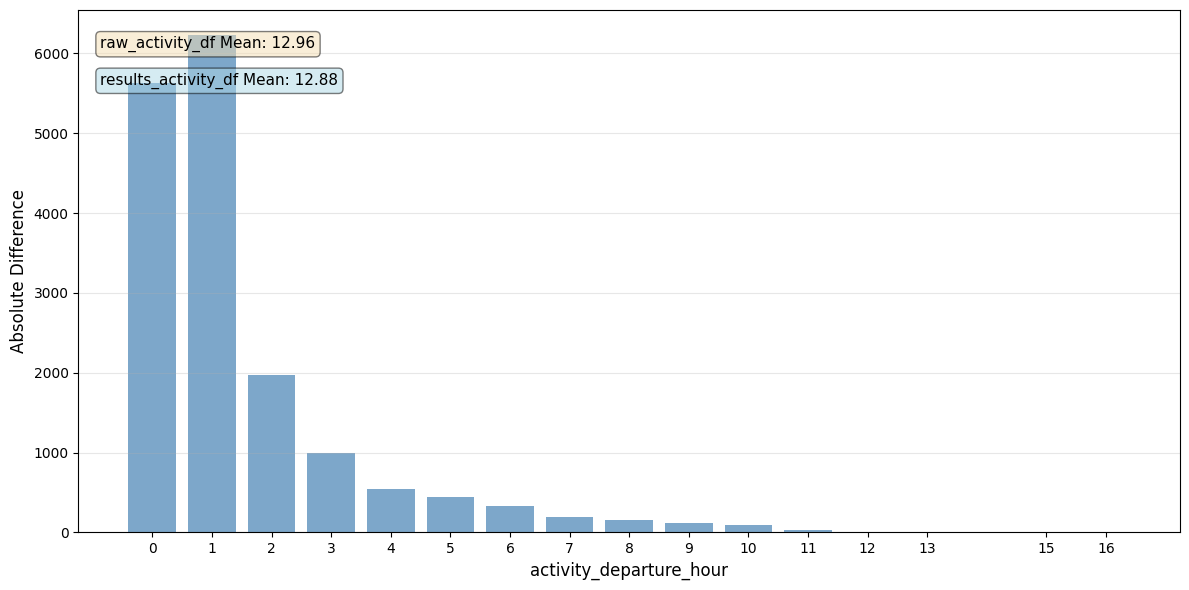

In [91]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_activity_df['activity_出发时间1小时时间段'] - results_activity_df['activity_出发时间1小时时间段'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_activity_df['activity_出发时间1小时时间段'].mean()
results_mean = results_activity_df['activity_出发时间1小时时间段'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('activity_departure_hour', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.3405005076748492


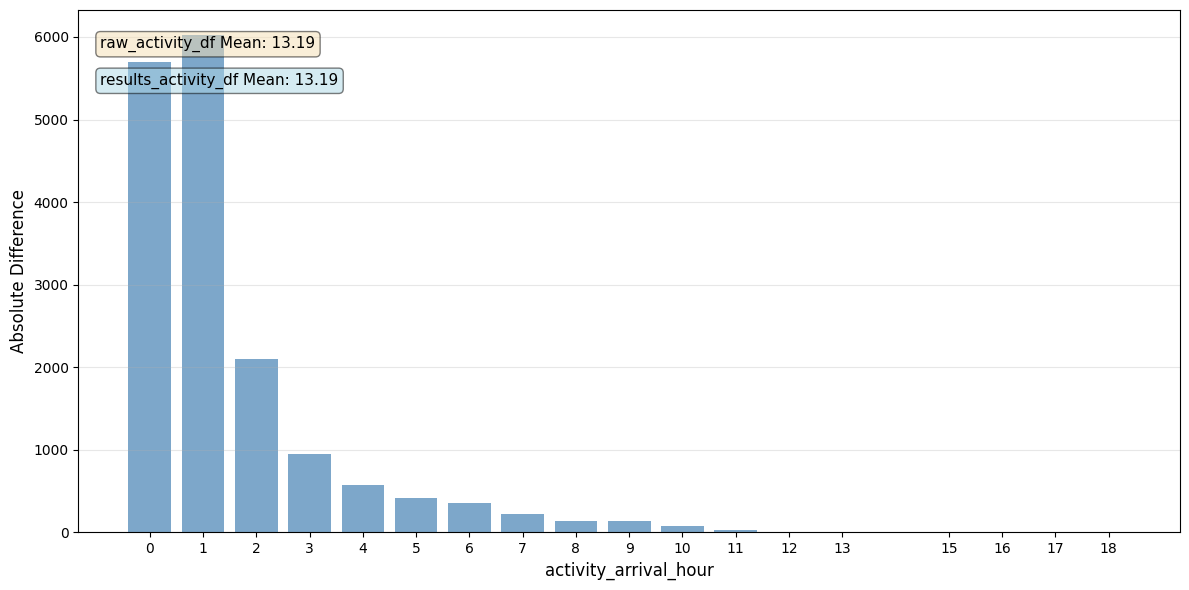

In [92]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_activity_df['activity_到达时间1小时时间段'] - results_activity_df['activity_到达时间1小时时间段'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_activity_df['activity_到达时间1小时时间段'].mean()
results_mean = results_activity_df['activity_到达时间1小时时间段'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('activity_arrival_hour', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.8033805172310816


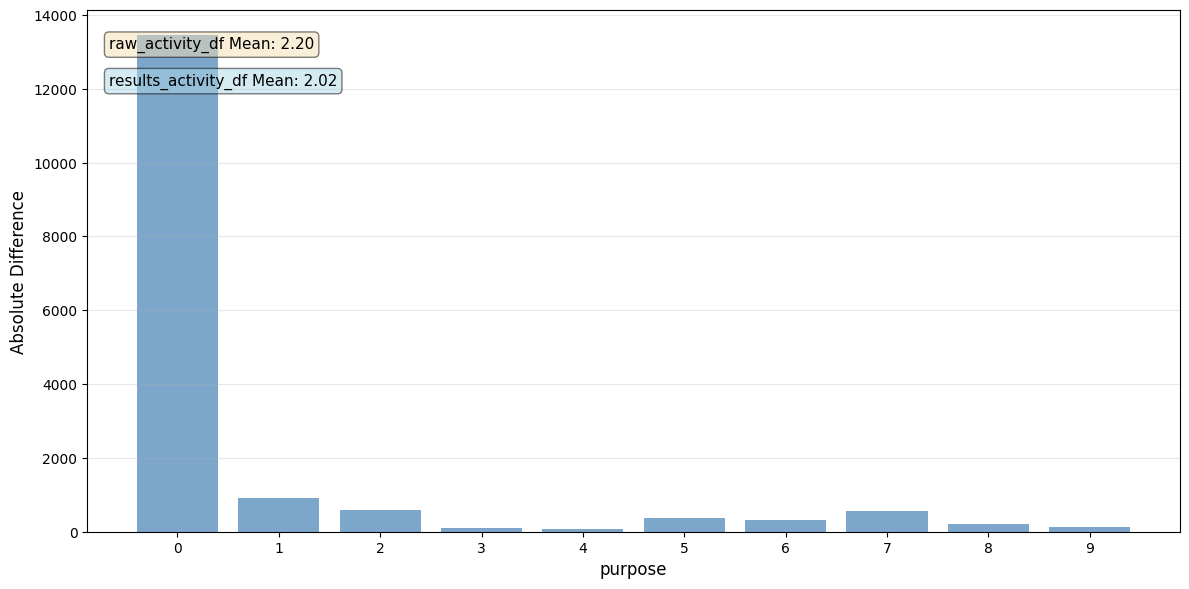

In [93]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_activity_df['purpose'] - results_activity_df['purpose'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_activity_df['purpose'].mean()
results_mean = results_activity_df['purpose'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('purpose', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.5681180194708236


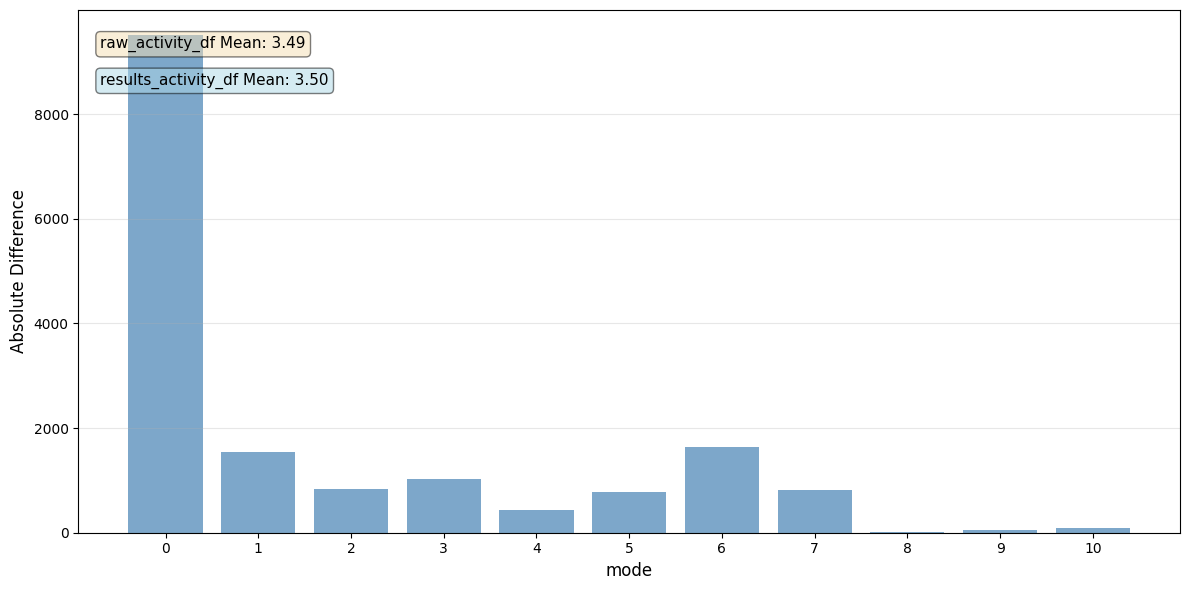

In [94]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_activity_df['mode'] - results_activity_df['mode'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_activity_df['mode'].mean()
results_mean = results_activity_df['mode'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('mode', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.8856835692528221


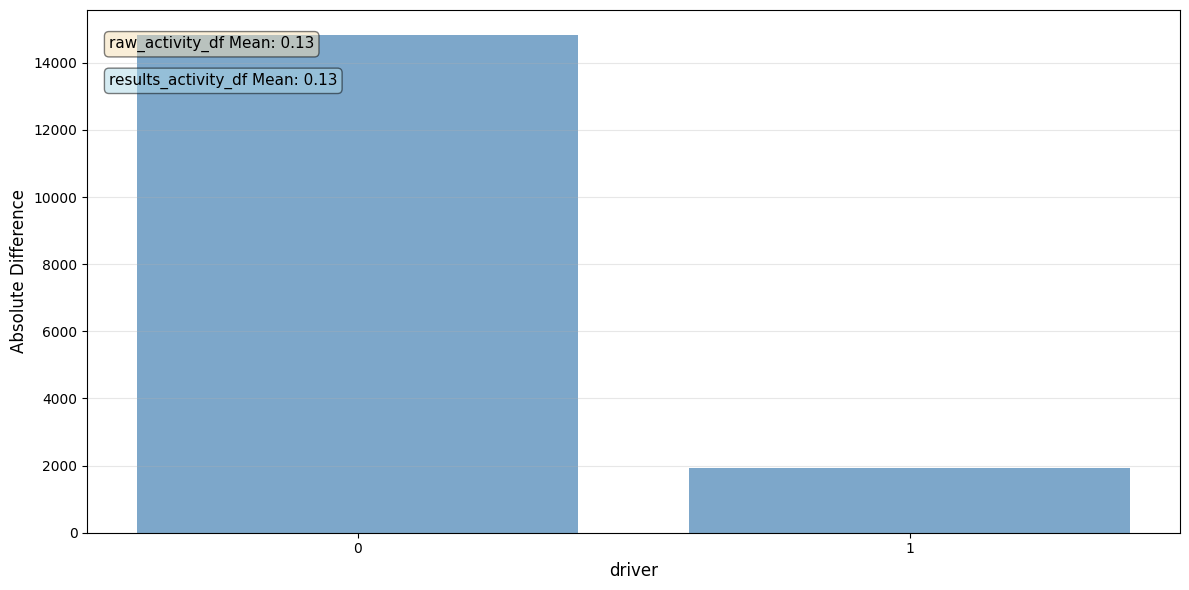

In [95]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_activity_df['driver'] - results_activity_df['driver'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_activity_df['driver'].mean()
results_mean = results_activity_df['driver'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('driver', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.96535865734934


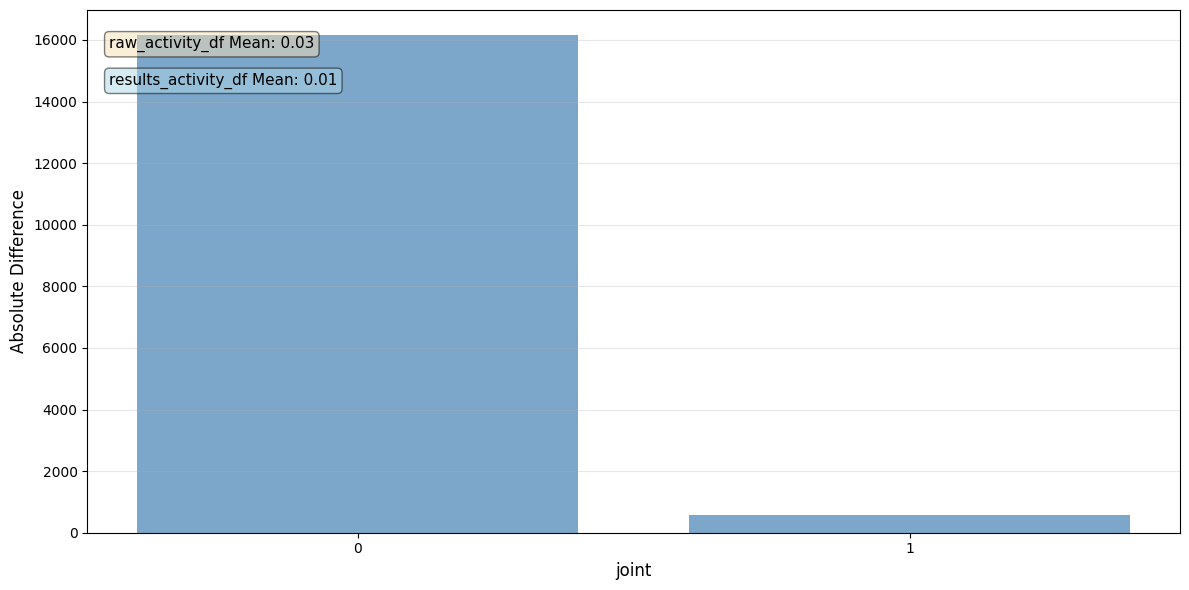

In [96]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_activity_df['joint'] - results_activity_df['joint'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_activity_df['joint'].mean()
results_mean = results_activity_df['joint'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('joint', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 精度比较2： 分布比较

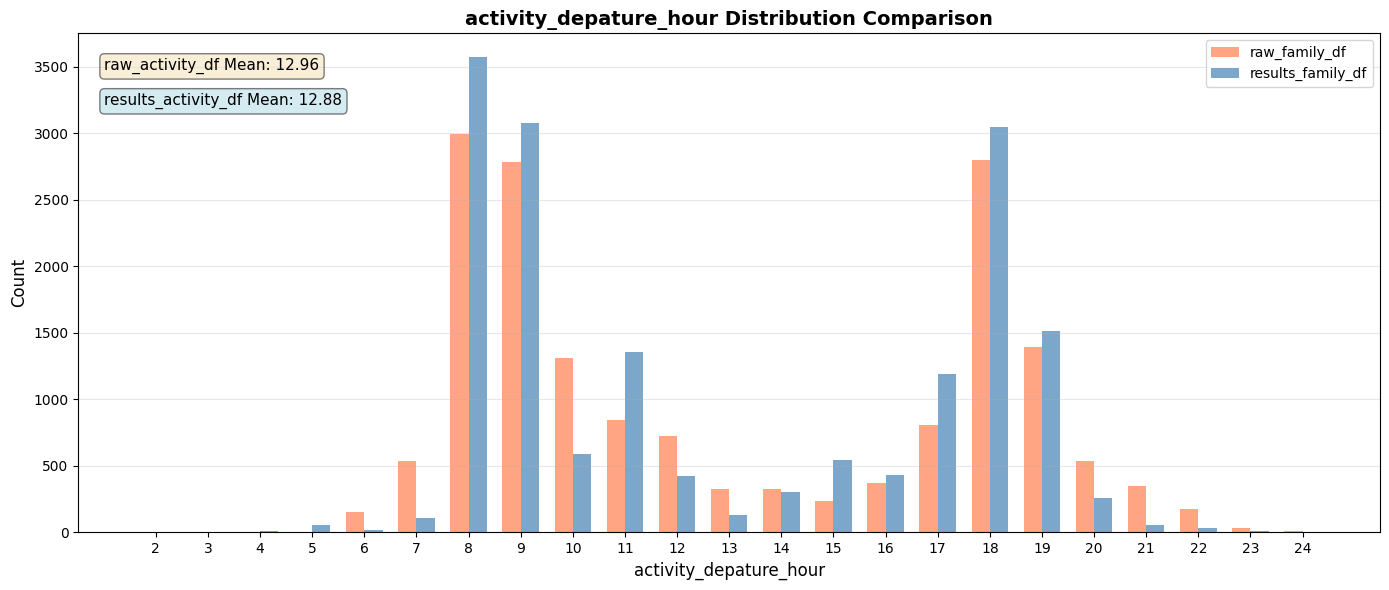

In [97]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_activity_df['activity_出发时间1小时时间段'].value_counts().sort_index()
results_age_counts = results_activity_df['activity_出发时间1小时时间段'].value_counts().sort_index()

# 计算均值
raw_mean = raw_activity_df['activity_出发时间1小时时间段'].mean()
results_mean = results_activity_df['activity_出发时间1小时时间段'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('activity_depature_hour', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('activity_depature_hour Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

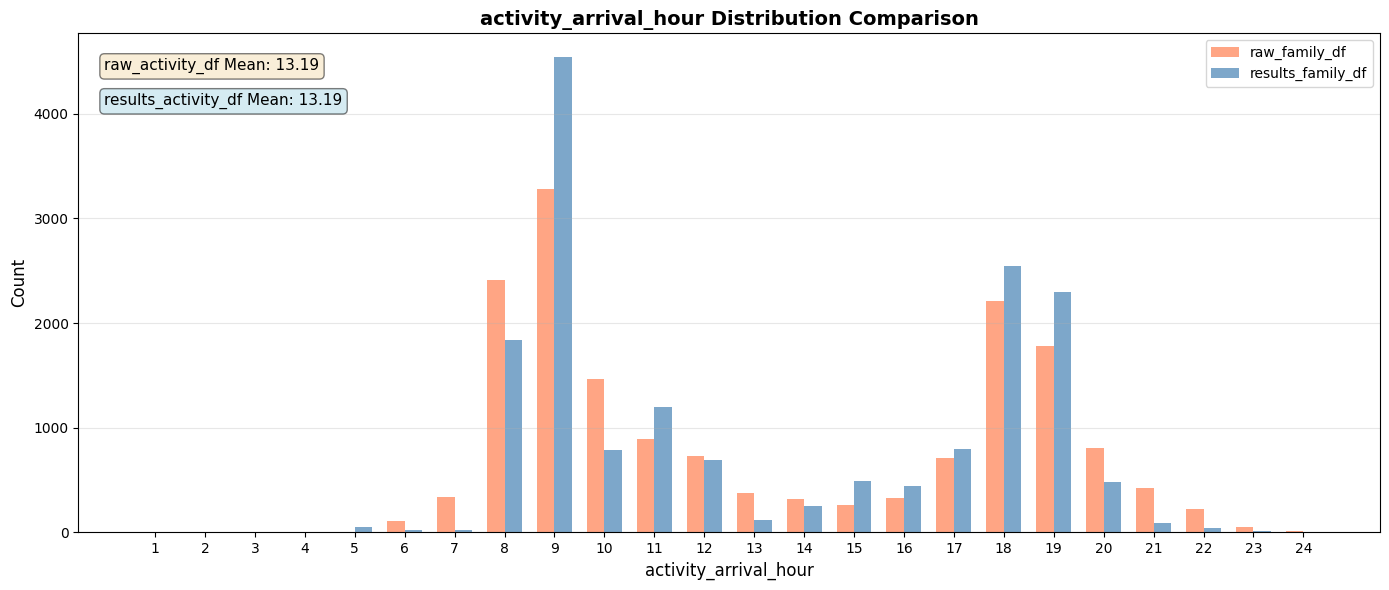

In [98]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_activity_df['activity_到达时间1小时时间段'].value_counts().sort_index()
results_age_counts = results_activity_df['activity_到达时间1小时时间段'].value_counts().sort_index()

# 计算均值
raw_mean = raw_activity_df['activity_到达时间1小时时间段'].mean()
results_mean = results_activity_df['activity_到达时间1小时时间段'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('activity_arrival_hour', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('activity_arrival_hour Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

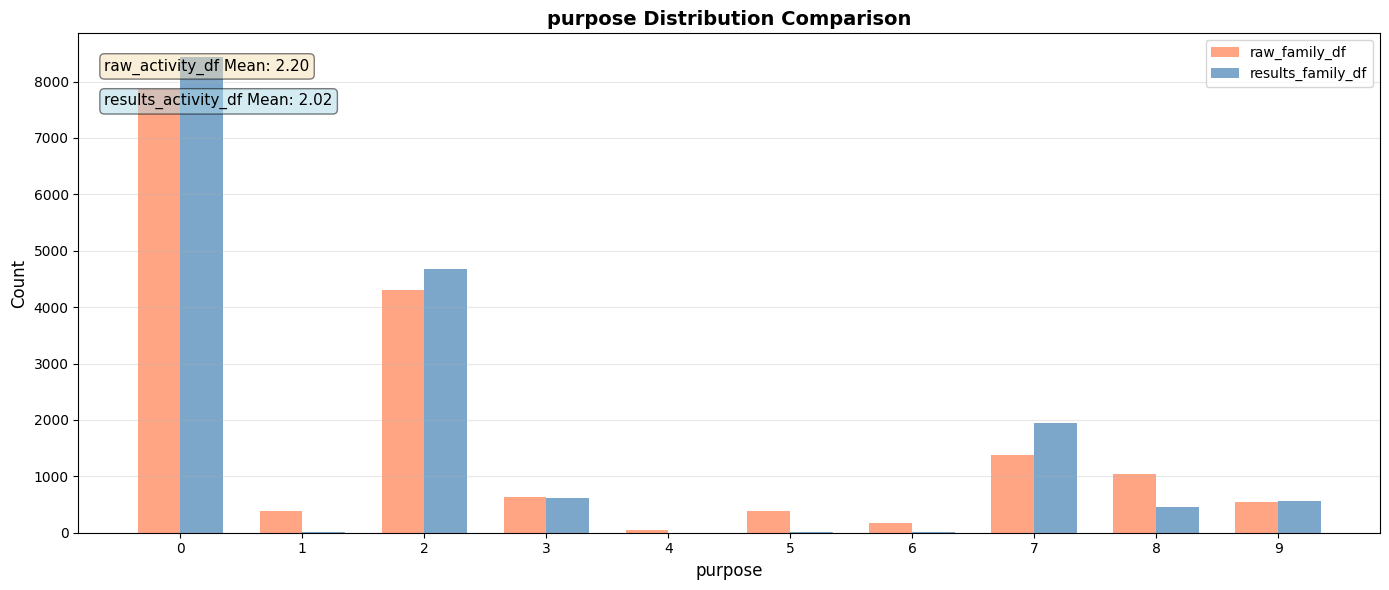

In [99]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_activity_df['purpose'].value_counts().sort_index()
results_age_counts = results_activity_df['purpose'].value_counts().sort_index()

# 计算均值
raw_mean = raw_activity_df['purpose'].mean()
results_mean = results_activity_df['purpose'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('purpose', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('purpose Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

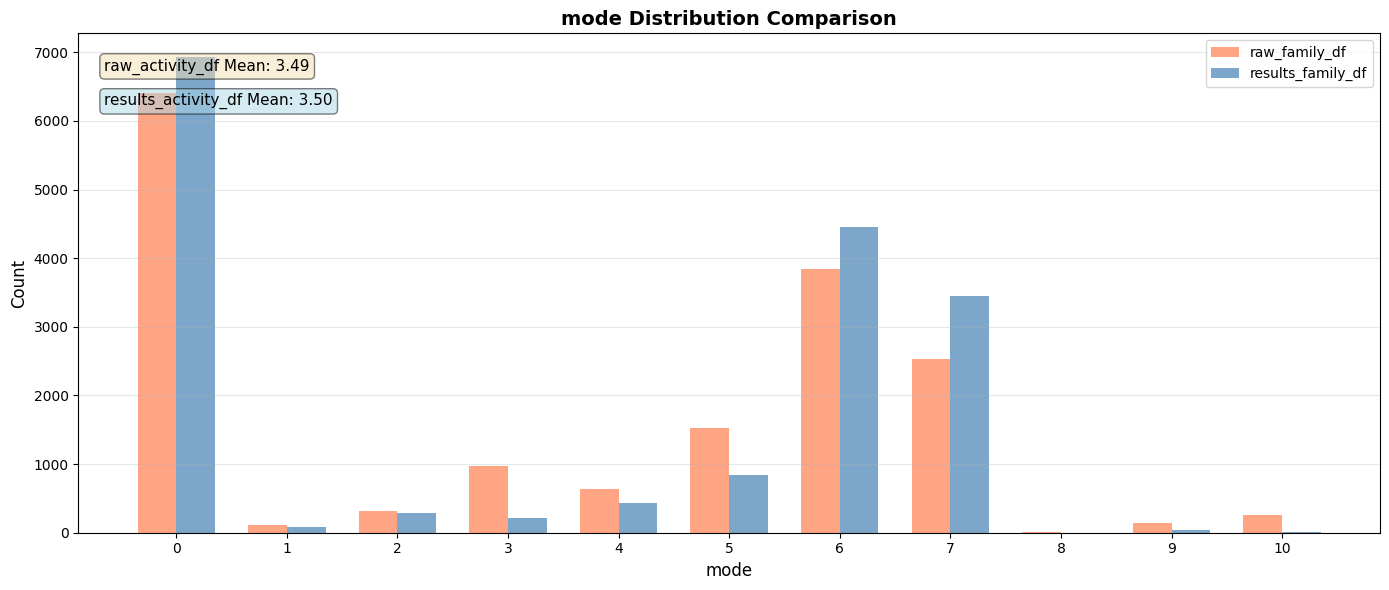

In [100]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_activity_df['mode'].value_counts().sort_index()
results_age_counts = results_activity_df['mode'].value_counts().sort_index()

# 计算均值
raw_mean = raw_activity_df['mode'].mean()
results_mean = results_activity_df['mode'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('mode', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('mode Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

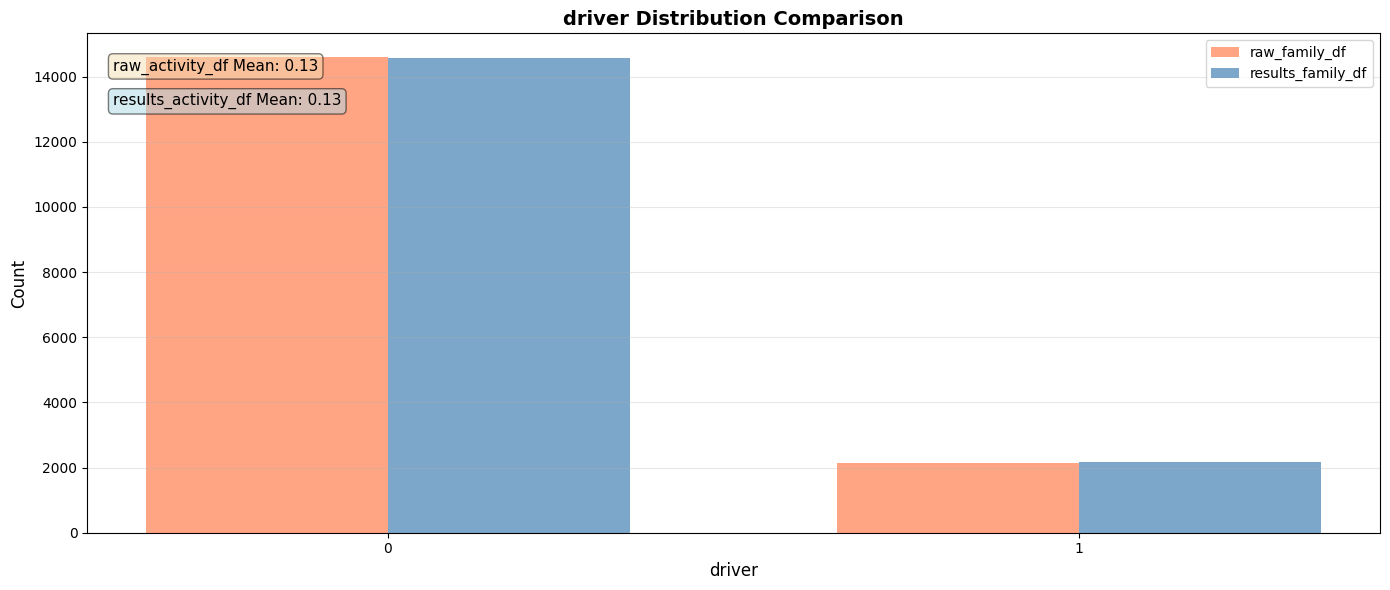

In [101]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_activity_df['driver'].value_counts().sort_index()
results_age_counts = results_activity_df['driver'].value_counts().sort_index()

# 计算均值
raw_mean = raw_activity_df['driver'].mean()
results_mean = results_activity_df['driver'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('driver', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('driver Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

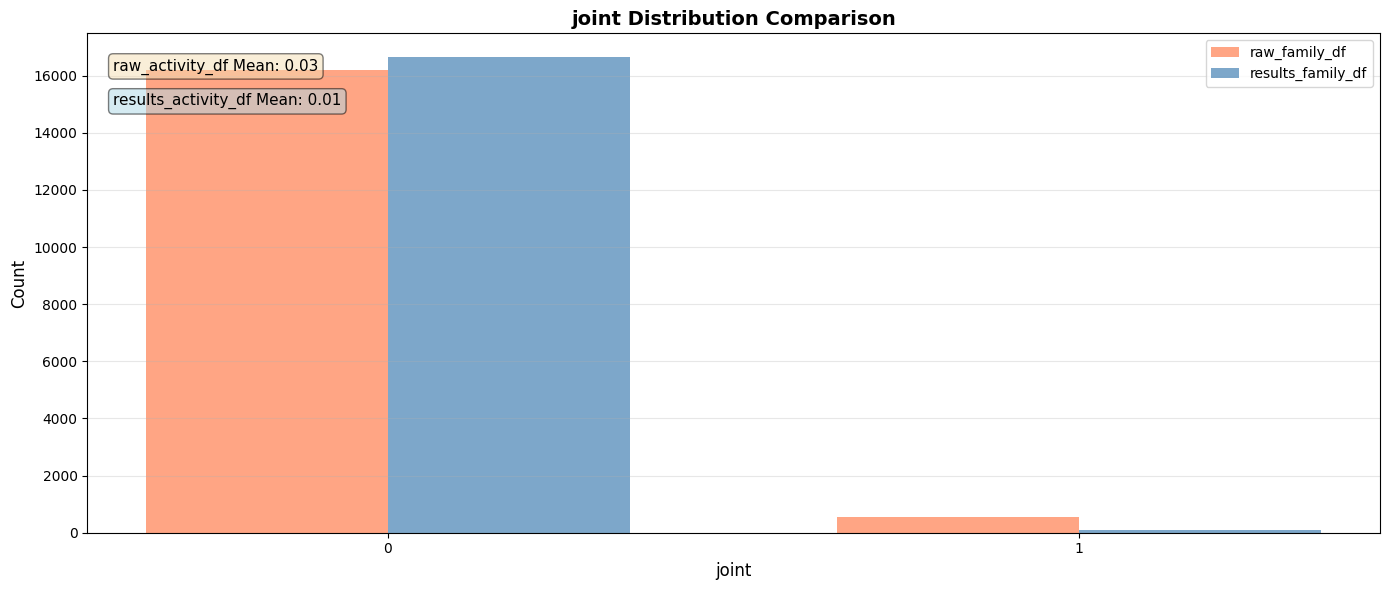

In [102]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_activity_df['joint'].value_counts().sort_index()
results_age_counts = results_activity_df['joint'].value_counts().sort_index()

# 计算均值
raw_mean = raw_activity_df['joint'].mean()
results_mean = results_activity_df['joint'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('joint', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('joint Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()